In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t
import math

In [2]:
def import_results(batch_size,seeds):
    performance_closed = []
    performance_open = []
    performance_rejection = []
    for s in seeds:
        closed_p = np.load("Results/performanceb"+str(batch_size)+"closedseed"+str(s)+".npy")
        open_p = np.load("Results/performanceb"+str(batch_size)+"openseed"+str(s)+".npy")
        rejection_p = np.load("Results/performancerejectionb"+str(batch_size)+"seed"+str(s)+".npy")
        performance_closed.append(closed_p)
        performance_open.append(open_p)
        performance_rejection.append(rejection_p)
    performance_closed = np.array(performance_closed)
    performance_open = np.array(performance_open)
    performance_rejection = np.array(performance_rejection)
    return performance_closed, performance_open, performance_rejection

In [3]:
def import_baseline(seeds):
    performance_closed = []
    performance_open = []
    performance_rejection = []
    for s in seeds:
        closed_p = np.load("Results/performancebaselineclosedseed"+str(s)+".npy")
        open_p = np.load("Results/performancebaselineopenseed"+str(s)+".npy")
        rejection_p = np.load("Results/performancerejectionbaselineseed"+str(s)+".npy")
        performance_closed.append(closed_p)
        performance_open.append(open_p)
        performance_rejection.append(rejection_p)
    performance_closed = np.array(performance_closed)
    performance_open = np.array(performance_open)
    performance_rejection = np.array(performance_rejection)
    return performance_closed, performance_open, performance_rejection

In [4]:
def average_confidence_interval(performance_closed, performance_open, performance_rejection):
    avg_closed = np.average(performance_closed,axis=0)
    avg_open = np.average(performance_open,axis=0)
    avg_rejection = np.average(performance_rejection)
    
    sd_closed = np.std(performance_closed,axis=0)
    sd_open = np.std(performance_open,axis=0)
    sd_rejection = np.std(performance_rejection)
    
    h_closed = np.zeros(len(avg_closed))
    h_open = np.zeros(len(avg_open))
    
    for i in range(len(avg_closed)):
        h_closed[i] = t.ppf((1 + 0.95) / 2., performance_closed.shape[1]-1)*sd_closed[i]/math.sqrt(performance_closed.shape[1])
        h_open[i] = t.ppf((1 + 0.95) / 2., performance_open.shape[1]-1)*sd_open[i]/math.sqrt(performance_open.shape[1])
        
    h_rejection = t.ppf((1 + 0.95) / 2., len(performance_rejection)-1)*sd_rejection/math.sqrt(len(performance_rejection))
    
    return avg_closed, avg_open, avg_rejection, h_closed, h_open, h_rejection

In [5]:
def average_confidence_baseline(performance_closed, performance_open, performance_rejection):
    avg_closed = np.average(performance_closed)
    avg_open = np.average(performance_open)
    avg_rejection = np.average(performance_rejection)
    
    sd_closed = np.std(performance_closed)
    sd_open = np.std(performance_open)
    sd_rejection = np.std(performance_rejection)
    
    h_closed = t.ppf((1 + 0.95) / 2., len(performance_closed)-1)*sd_closed/math.sqrt(len(performance_closed))
    h_open = t.ppf((1 + 0.95) / 2., len(performance_open)-1)*sd_open/math.sqrt(len(performance_open)) 
    h_rejection = t.ppf((1 + 0.95) / 2., len(performance_rejection)-1)*sd_rejection/math.sqrt(len(performance_rejection))
    
    return avg_closed, avg_open, avg_rejection, h_closed, h_open, h_rejection

In [7]:
closed25, open25, reject25 = import_results(25,np.arange(5))
closed50, open50, reject50 = import_results(50,np.arange(5))
closed100, open100, reject100 = import_results(100,np.arange(5))
closed250, open250, reject250 = import_results(250,np.arange(5))
closed_base, open_base, reject_base = import_baseline(np.arange(5))

In [8]:
avg_closed_25, avg_open_25, avg_reject_25, h_closed_25, h_open_25, h_reject_25 = average_confidence_interval(closed25, open25, reject25)
avg_closed_50, avg_open_50, avg_reject_50, h_closed_50, h_open_50, h_reject_50 = average_confidence_interval(closed50, open50, reject50)
avg_closed_100, avg_open_100, avg_reject_100, h_closed_100, h_open_100, h_reject_100 = average_confidence_interval(closed100, open100, reject100)
avg_closed_250, avg_open_250, avg_reject_250, h_closed_250, h_open_250, h_reject_250 = average_confidence_interval(closed250, open250, reject250)
avg_closed_base, avg_open_base, avg_reject_base, h_closed_base, h_open_base, h_reject_base = average_confidence_baseline(closed_base, open_base, reject_base)

In [9]:
x25 = np.arange(int(500/25)+1)*25
x50 = np.arange(int(500/50)+1)*50
x100 = np.arange(int(500/100)+1)*100
x250 = np.arange(int(500/250)+1)*250

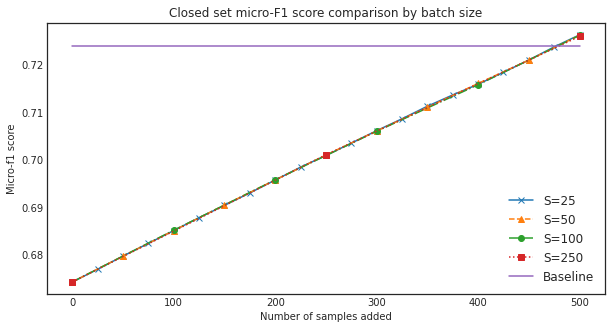

In [10]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Closed set micro-F1 score comparison by batch size')    
    plt.plot(x25, avg_closed_25, 'x-')
    plt.plot(x50, avg_closed_50, '^--')
    plt.plot(x100, avg_closed_100, 'o-.')
    plt.plot(x250, avg_closed_250, 's:')
    plt.plot([0, 500], np.repeat(avg_closed_base, 2))
    plt.legend(['S=25','S=50','S=100','S=250','Baseline'], fontsize = 'large')
    plt.xlabel('Number of samples added')
    plt.ylabel('Micro-f1 score')
    plt.show()

In [17]:
print("Final S25 closed set micro-F1 score: "+str(round(avg_closed_25[-1],4))+" +/- "+str(round(h_closed_25[-1],4)))

Final S25 closed set micro-F1 score: 0.7263 +/- 0.002


In [18]:
print("Final S50 closed set micro-F1 score: "+str(round(avg_closed_50[-1],4))+" +/- "+str(round(h_closed_50[-1],4)))

Final S50 closed set micro-F1 score: 0.7262 +/- 0.0029


In [19]:
print("Final S100 closed set micro-F1 score: "+str(round(avg_closed_100[-1],4))+" +/- "+str(round(h_closed_100[-1],4)))

Final S100 closed set micro-F1 score: 0.7262 +/- 0.0045


In [20]:
print("Final S250 closed set micro-F1 score: "+str(round(avg_closed_250[-1],4))+" +/- "+str(round(h_closed_250[-1],4)))

Final S250 closed set micro-F1 score: 0.726 +/- 0.0108


In [21]:
print("Baseline closed set micro-F1 score: "+str(round(avg_closed_base,4))+" +/- "+str(round(h_closed_base,4)))

Baseline closed set micro-F1 score: 0.7239 +/- 0.0023


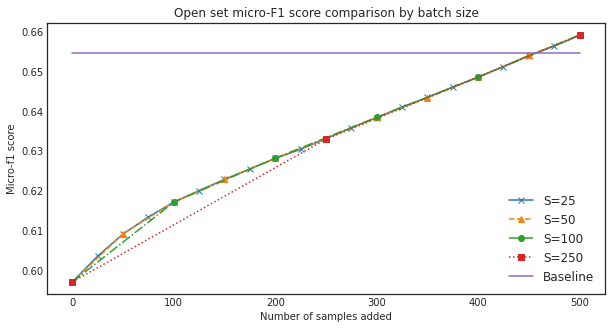

In [11]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Open set micro-F1 score comparison by batch size')    
    plt.plot(x25, avg_open_25, 'x-')
    plt.plot(x50, avg_open_50, '^--')
    plt.plot(x100, avg_open_100, 'o-.')
    plt.plot(x250, avg_open_250, 's:')
    plt.plot([0, 500], np.repeat(avg_open_base, 2))
    plt.legend(['S=25','S=50','S=100','S=250','Baseline'], fontsize = 'large')
    plt.xlabel('Number of samples added')
    plt.ylabel('Micro-f1 score')
    plt.show()

In [23]:
print("Final S25 open set micro-F1 score: "+str(round(avg_open_25[-1],4))+" +/- "+str(round(h_open_25[-1],4)))

Final S25 open set micro-F1 score: 0.6589 +/- 0.0037


In [24]:
print("Final S50 open set micro-F1 score: "+str(round(avg_open_50[-1],4))+" +/- "+str(round(h_open_50[-1],4)))

Final S50 open set micro-F1 score: 0.6589 +/- 0.0054


In [25]:
print("Final S100 open set micro-F1 score: "+str(round(avg_open_100[-1],4))+" +/- "+str(round(h_open_100[-1],4)))

Final S100 open set micro-F1 score: 0.659 +/- 0.0086


In [26]:
print("Final S250 open set micro-F1 score: "+str(round(avg_open_250[-1],4))+" +/- "+str(round(h_open_250[-1],4)))

Final S250 open set micro-F1 score: 0.6589 +/- 0.0203


In [27]:
print("Baseline open set micro-F1 score: "+str(round(avg_open_base,4))+" +/- "+str(round(h_open_base,4)))

Baseline open set micro-F1 score: 0.6545 +/- 0.0027


In [28]:
x_reject = [25, 50, 100, 250]

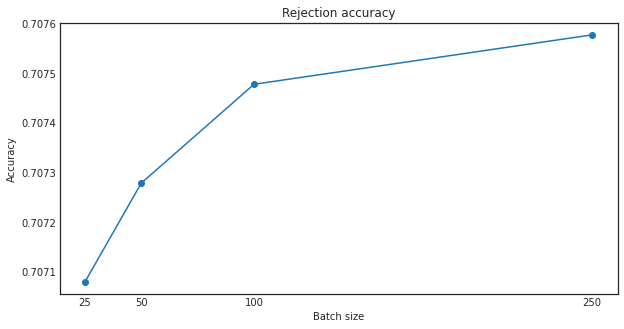

In [35]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Rejection accuracy')    
    plt.plot(x_reject, [avg_reject_25, avg_reject_50, avg_reject_100, avg_reject_250])
    plt.scatter(x_reject, [avg_reject_25, avg_reject_50, avg_reject_100, avg_reject_250])
    plt.xticks([25, 50, 100, 250])
    plt.xlabel('Batch size')
    plt.ylabel('Accuracy')
    plt.show()

In [36]:
print("Final S25 unknown class rejection accuracy: "+str(round(avg_reject_25,4))+" +/- "+str(round(h_reject_25,4)))

Final S25 unknown class rejection accuracy: 0.7071 +/- 0.0278


In [37]:
print("Final S50 unknown class rejection accuracy: "+str(round(avg_reject_50,4))+" +/- "+str(round(h_reject_50,4)))

Final S50 unknown class rejection accuracy: 0.7073 +/- 0.028


In [38]:
print("Final S100 unknown class rejection accuracy: "+str(round(avg_reject_100,4))+" +/- "+str(round(h_reject_100,4)))

Final S100 unknown class rejection accuracy: 0.7075 +/- 0.0282


In [39]:
print("Baseline unknown class rejection accuracy: "+str(round(avg_reject_base,4))+" +/- "+str(round(h_reject_base,4)))

Baseline unknown class rejection accuracy: 0.6775 +/- 0.0151
